In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
%matplotlib inline

e:\ProgramsInstalled\Anaconda\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
e:\ProgramsInstalled\Anaconda\lib\site-packages\flask\json\__init__.py:31: DeprecationWarning: Importing 'itsdangerous.json' is deprecated and will be removed in ItsDangerous 2.1. Use Python's 'json' module instead.
  _slash_escape = "\\/" not in _json.dumps("/")
e:\ProgramsInstalled\Anaconda\lib\site-packages\flask\json\__init__.py:61: DeprecationWarning: Importing 'itsdangerous.json' is deprecated and will be removed in ItsDangerous 2.1. Use Python's 'json' module instead.
  class JSONEncoder(_json.JSONEncoder):
e:\ProgramsInstalled\Anaconda\lib\site-packages\flask\json\__init__.py:103: DeprecationWarning: Importing 'itsdangerous.json' is deprecated and will be removed in ItsDangerous 2.1. Use Python's 'json' module instead.
  class JSONDecoder(_json.JSONDecoder):

In [2]:
asos_df = pd.read_csv("ASOS_Trustpilot_45.csv")
print(asos_df.head())

              Name              Date  \
0   Dawn Pickering  January 05, 2023   
1  Morgan Richards  January 05, 2023   
2             RELB  January 04, 2023   
3             Tara  January 05, 2023   
4    Patrick Burke  January 04, 2023   

                                    Review_Title  \
0         I had problems with a non delivery of…   
1                      PaulynJane was so helpful   
2                               Customer Service   
3  Great service! I would highly recommend ASOS.   
4       Both customer care staff I've spoken to…   

                                         Review_Text Location  \
0  I had problems with a non delivery of an order...       GB   
1  PaulynJane was so helpful. I purchased from as...       US   
2  I have been waiting for my parcel since 20/12/...       GB   
3  Customer Service Agent Dan was very helpful an...       AU   
4  Both customer care staff I've spoken to about ...       GB   

                   Rating  
0  Rated 5 out of 5 stars  

In [3]:
asos_df.Date=asos_df.Date.apply(pd.to_datetime, errors ='coerce')

asos_df["month"]=asos_df.Date.dt.month
asos_df["year"]=asos_df.Date.dt.year

asos_df.drop("Date", axis=1, inplace=True)

In [4]:
asos_df.head()

,Name,Review_Title,Review_Text,Location,Rating,month,year
0,Dawn Pickering,I had problems with a non delivery of…,I had problems with a non delivery of an order...,GB,Rated 5 out of 5 stars,1,2023
1,Morgan Richards,PaulynJane was so helpful,PaulynJane was so helpful. I purchased from as...,US,Rated 5 out of 5 stars,1,2023
2,RELB,Customer Service,I have been waiting for my parcel since 20/12/...,GB,Rated 4 out of 5 stars,1,2023
3,Tara,Great service! I would highly recommend ASOS.,Customer Service Agent Dan was very helpful an...,AU,Rated 5 out of 5 stars,1,2023
4,Patrick Burke,Both customer care staff I've spoken to…,Both customer care staff I've spoken to about ...,GB,Rated 5 out of 5 stars,1,2023


In [8]:

year = asos_df['year'].value_counts()
year_list = year.index

fig = go.Figure(data=[go.Pie(labels=year_list[:10], values=year.sort_values(ascending=False).iloc[:10], textinfo='label+percent', 
    marker_colors=['#FFD700', '#FF8C00', '#FF0000', '#F08080', '#CD5C5C', '#87CEFA', '#4169E1', '#0000FF', '#00BFFF', '#008000'])]) 
fig.update_layout(
    title={
        'text': "Positive Review Year Distribution",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'middle'
    },
    legend={
        'x': 0.75,
        'y': 0.5,
        'xanchor': 'center',
        'yanchor': 'middle'
    }
)
fig.update_yaxes(automargin=True)
fig.show()

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [13]:

Loc = asos_df['Location'].value_counts()
loc_list = Loc.index

fig = go.Figure(data=[go.Pie(labels=loc_list[:10], values=Loc.sort_values(ascending=False).iloc[:10], textinfo='label+percent', 
    marker_colors=['#FFD700', '#FF8C00', '#FF0000', '#F08080', '#CD5C5C', '#87CEFA', '#4169E1', '#0000FF', '#00BFFF', '#008000'])]) 
fig.update_layout(
    title={
        'text': "Positive Review Location Distribution",
        'x': 0.50,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'middle'
    },
    legend={
        'x': 1,
        'y': 0.5,
        'xanchor': 'center',
        'yanchor': 'middle'
    },
    width=800,
    height=600
)
fig.update_yaxes(automargin=True)
fig.show()

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



e:\ProgramsInstalled\Anaconda\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or tex

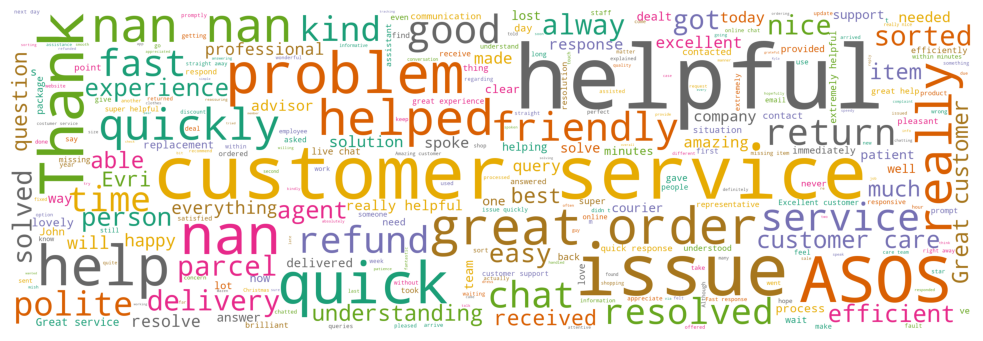

In [14]:
# process review data to txt
asos_df['Review_Text']=asos_df['Review_Text'].astype('str')
Reviews_Text = " ".join(txt for txt in asos_df.Review_Text)

# draw the word cloud
wc = WordCloud(background_color = 'white', mode = 'RGB',
               width = 3000, max_words = 300, height = 1000,
                contour_width = 2, contour_color = 'black',colormap = 'Dark2')
wc.generate(Reviews_Text)

# plot the figure
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [14]:
stopword = stopwords.words("english")
disney_stopwords = ['ASOS', 'asos', 'order', 'item']


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in disney_stopwords] for doc in texts]


def clean_topic(data):
    cleaned_data = data.Review_Text.values.tolist()
    cleaned_data = [re.sub('\S*@\S*\s?', '', sent) for sent in cleaned_data]
    cleaned_data = [re.sub('\s+', ' ', sent) for sent in cleaned_data]
    cleaned_data = [re.sub("\'", "", sent) for sent in cleaned_data]
    cleaned_data = list(sent_to_words(cleaned_data))
    cleaned_data = remove_stopwords(cleaned_data)

    return cleaned_data

# Define lemmatization

def lemmatization(texts, NLP, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = NLP(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out



<>:17: DeprecationWarning:

invalid escape sequence \S

<>:18: DeprecationWarning:

invalid escape sequence \s

<>:17: DeprecationWarning:

invalid escape sequence \S

<>:18: DeprecationWarning:

invalid escape sequence \s

C:\Users\annab\AppData\Local\Temp\ipykernel_19836\1087925319.py:17: DeprecationWarning:

invalid escape sequence \S

C:\Users\annab\AppData\Local\Temp\ipykernel_19836\1087925319.py:18: DeprecationWarning:

invalid escape sequence \s



In [46]:
def lda_model(data):
    data = clean_topic(data)
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    data = lemmatization(data, nlp, 
        allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    # Create Dictionary
    id2word = corpora.Dictionary(data)

    # Create Corpus
    texts = data

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
                                           
    doc_lda = lda_model[corpus]

    return lda_model, corpus, id2word, texts

In [37]:
def compute_coherence_values(dictionary, corpus, texts, start, stop):

    coherence_values = []
    model_list = []
    for num_topics in range(start, stop):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                              num_topics=num_topics,
                                              id2word=id2word,
                                              random_state=90,
                                              alpha='auto',
                                              eta='auto',
                                              per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,
                             dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

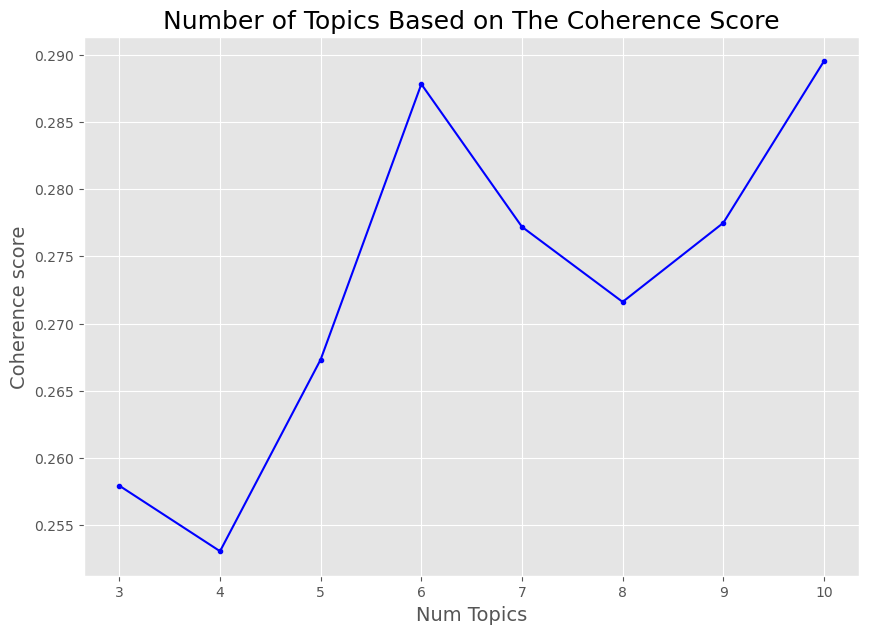

In [39]:
lda_model1, corpus, id2word, texts = lda_model(asos_df)

# Test the best number of topics
start = 3
stop = 11

model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                    corpus = corpus,
                                    texts = texts,
                                    start=start, stop=stop)

x = range(start, stop)
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.plot(x, coherence_values, color = "blue",marker=".")
plt.xlabel("Num Topics", size=14)
plt.ylabel("Coherence score", size=14)
plt.title('Number of Topics Based on The Coherence Score',size=18)
plt.show()

In [32]:
def clean(data):
    data["Review_Text"] = data["Review_Text"].str.replace("\d","")
    word = " ".join(review for review in data["Review_Text"])
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    word = word.lower()
    cleaned_words = re.sub('\W', ' ', word)
    tokens = nltk.word_tokenize(cleaned_words)
    stopword = stopwords.words("english")
    disney_stopwords = ['disneyland', 'park', 'disney', 'disneyworld','disney land', 'disney world',
                    'california', 'hong kong','kong', 'hong', 'hk', 'paris']
    cleaned_tokens = [token for token in tokens if token not in stopword]
    cleaned_tokens = [cleaned_token for cleaned_token in cleaned_tokens if cleaned_token not in disney_stopwords]
    return cleaned_tokens


<>:2: DeprecationWarning:

invalid escape sequence \d

<>:6: DeprecationWarning:

invalid escape sequence \W

<>:2: DeprecationWarning:

invalid escape sequence \d

<>:6: DeprecationWarning:

invalid escape sequence \W

C:\Users\annab\AppData\Local\Temp\ipykernel_19836\4010669126.py:2: DeprecationWarning:

invalid escape sequence \d

C:\Users\annab\AppData\Local\Temp\ipykernel_19836\4010669126.py:6: DeprecationWarning:

invalid escape sequence \W



In [33]:
# Select the row that contains the key word
website = asos_df[asos_df['Review_Text'].str.contains('information')]

# Recreate the DataFrame from the selected row
asos_website = pd.DataFrame(website)

# Print the new DataFrame
asos_website

,Name,Review_Title,Review_Text,Location,Rating,month,year
3,Tara,Great service! I would highly recommend ASOS.,Customer Service Agent Dan was very helpful an...,AU,Rated 5 out of 5 stars,1,2023
56,Elena,I was chatting with Paulene,"I was chatting with Paulene, very helpful and ...",GB,Rated 5 out of 5 stars,1,2023
485,shon elbaz,the assistans was great,the assistans was great! helped me with everyt...,IL,Rated 5 out of 5 stars,12,2022
495,Jessica de Brouwer,Great customer service,Great information supplied and very quick and ...,NL,Rated 5 out of 5 stars,12,2022
1010,Jeffrey,Very helpful,Very helpful! Thanks Jay for your information ...,NL,Rated 5 out of 5 stars,12,2022
1182,LB,Very Helpful Team,The responses were fast with the information I...,GB,Rated 5 out of 5 stars,12,2022
1229,J Patrick,Janno was efficient in getting the…,Janno was efficient in getting the information...,GB,Rated 5 out of 5 stars,12,2022
1277,Mrs Amy Upton,Let down by their chosen courier … EVRi,I regularly shop with ASOS (often I’ll order i...,GB,Rated 4 out of 5 stars,12,2022
1344,Ce Kiomi,Thank you Ariane.,"Thank you for your help ""Ariane"" great custome...",GB,Rated 4 out of 5 stars,12,2022
1409,Tasha Squire,Kimberley 5*,I was chasing up my order which I made on an e...,GB,Rated 5 out of 5 stars,12,2022


In [47]:
lda_model1, corpus, id2word, texts = lda_model(asos_df)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model1, corpus, id2word)
vis

e:\ProgramsInstalled\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.361603 -0.000904       1        1  63.928942
3     -0.122257 -0.258603       2        1  16.489088
0     -0.107488  0.120192       3        1  10.176639
1     -0.131859  0.139315       4        1   9.405330, topic_info=         Term        Freq       Total Category  logprob  loglift
59       very  669.000000  669.000000  Default  30.0000  30.0000
14    helpful  574.000000  574.000000  Default  29.0000  29.0000
22    service  478.000000  478.000000  Default  28.0000  28.0000
4    customer  436.000000  436.000000  Default  27.0000  27.0000
53     parcel   86.000000   86.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
680     short    9.595591   10.292817   Topic4  -5.0707   2.2938
269       bit    9.098991    9.780187   Topic4  -5.1238   2.2917
174        at    8.883159    9.557802   Topic4  -5.1478   2.2907
431   exactly    9.437769   10.288186   Topic4  -5.0872   2.2776
153       too   11.029471   26.245884   Topic4  -4.9314   1.4970

[167 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
190       3  0.932636    address
302       3  0.902698     advise
640       2  0.939715        all
26        1  0.853419     always
26        2  0.136968     always
...     ...       ...        ...
275       3  0.978622       week
836       3  0.904381      whole
474       3  0.966548  wonderful
42        2  0.974590      wrong
111       2  0.976541       year

[154 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [42]:
lda_model1, corpus, id2word, texts = lda_model(asos_website)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model1, corpus, id2word)
vis

e:\ProgramsInstalled\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.163351  0.021616       1        1  30.979178
5     -0.100068  0.104098       2        1  27.161701
3     -0.081317 -0.080757       3        1  22.100117
4     -0.002593 -0.066844       4        1  15.635427
1      0.003560  0.016871       5        1   4.016985
0      0.017066  0.005016       6        1   0.106592, topic_info=         Term      Freq     Total Category  logprob  loglift
19       very  9.000000  9.000000  Default  30.0000  30.0000
146     email  3.000000  3.000000  Default  29.0000  29.0000
76   delivery  4.000000  4.000000  Default  28.0000  28.0000
103     order  4.000000  4.000000  Default  27.0000  27.0000
37      thank  5.000000  5.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
45       make  0.002000  1.980025   Topic6  -5.4322  -0.0538
138      able  0.001997  1.939936   Topic6  -5.4336  -0.0348
19       very  0.002048  9.212837   Topic6  -5.4084  -1.5675
11      issue  0.002043  8.586134   Topic6  -5.4108  -1.4995
22      clear  0.002007  3.246131   Topic6  -5.4289  -0.5449

[327 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
138       3  1.030962        able
139       3  0.812318     account
164       1  0.766879      action
180       3  0.808498  additional
140       3  1.035471     address
...     ...       ...         ...
233       2  0.987944     website
126       1  0.497376        week
126       3  0.497376        week
50        2  0.782988        well
179       1  0.766879       wrong

[234 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 4, 5, 2, 1])

In [48]:
# This code was adapted from https://www.kaggle.com/code/ahmedterry/disneyland-reviews-nlp-sentiment-analysis

review = asos_df['Review_Text'].drop_duplicates()
all_sentences = []

for word in review:
    all_sentences.append(word)

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)
#== 

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)
#== 
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
#== 
import spacy
nlp = spacy.load('en_core_web_lg')
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#== 
df = pd.DataFrame(stem2)
df = df[0].value_counts()
#== 
df = df[:20,]
#== 
nlp = en_core_web_sm.load()
#====== 
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
#======
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000
#=====
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

In [49]:
import plotly.express as px
df6['Word'] = df6.Word.apply(lambda x: x.lower())

df6_top10 = df6.groupby("Entity").apply(lambda x: x.Word.value_counts().nlargest(10))
df6_top10 = df6_top10.reset_index()
df6_top10.columns = ["Entity", "Word", "count"]

fig = px.treemap(df6_top10, path=['Entity', 'Word'], values='count',
                 title='Top 10 frequent words in each Entity',
                 hover_data=['count'], height=800, width=1200)
fig.show()

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [50]:
df6['Entity'].value_counts()
negative= df6.groupby(['Entity']).size().to_frame('count').reset_index()
negative.sort_values(by='count', ascending=False)[:10]
fig = px.pie(negative, values='count', names='Entity')
fig.show()

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

e:\ProgramsInstalled\Anaconda\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



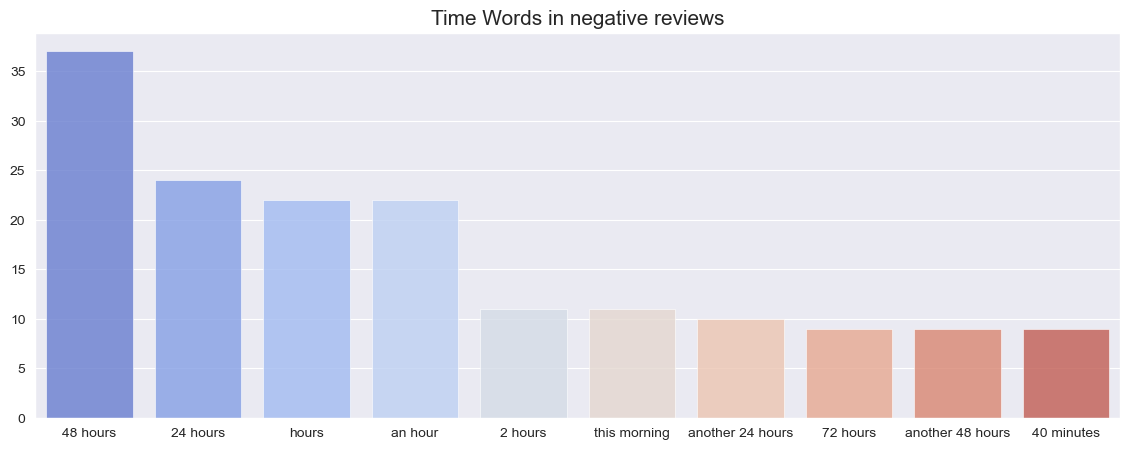

In [ ]:
TIME = df6.query("Entity == 'TIME'")
TIME =TIME['Word'].value_counts()
TIME = TIME[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
TIME = sns.barplot(x=TIME.index,y= TIME.values, alpha=0.8,palette="coolwarm");
plt.title('Time Words in negative reviews',fontsize=15);
plt.show();

In [20]:
DATE = df6.query("Entity == 'DATE'")
DATE = DATE['Word'].value_counts()
DATE = DATE[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
DATE = sns.barplot(x=DATE.index,y= DATE.values, alpha=0.8,palette="coolwarm");
plt.title('DATE Words in negative reviews',fontsize=15);
plt.show();

NameError: name 'df6' is not defined